In [27]:
# Notwendige Importe
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd 
# Verbindung zur PostgreSQL-Datenbank herstellen
db_user = 'postgres'
db_password = 'neues_passwort'
db_host = 'localhost'
db_port = '5432'
db_name = 'postgres'

# Engine erstellen
engine = sql.create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Funktion zum Laden eines DataFrames aus der PostgreSQL-Datenbank
def load_table(table_name, engine):
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, engine)
    return df

# Laden der notwendigen Tabellen
stadt_typen_df = load_table('dim_stadt_typen', engine)
erwerbsstatus_df = load_table('dim_erwerbsstatus', engine)
gemeinde_df = load_table('dim_gemeinde', engine)
gemeindeverband_df = load_table('dim_gemeindeverband', engine)
kreis_df = load_table('dim_stadtkreiskreisfreiestadtlandkreis', engine)
regierungsbezirk_df = load_table('dim_regierungsbezirk', engine)
land_df = load_table('dim_land', engine)




# Staedte

In [28]:
# Merge der Tabellen zur Erstellung eines vollständigen Datensatzes mit Erwerbstätigkeit und zugehörigen Städten
merged_df = erwerbsstatus_df.merge(gemeinde_df, left_on='schluessel', right_on='gemeindeschluessel', how='left', suffixes=('', '_drop'))
merged_df = merged_df.merge(stadt_typen_df, left_on='schluessel', right_on='schluessel', how='left', suffixes=('', '_drop'))
merged_df = merged_df.merge(gemeindeverband_df, left_on='gemeindeverbandsschluessel', right_on='gemeindeverbandsschluessel', how='left', suffixes=('', '_drop'))
merged_df = merged_df.merge(kreis_df, left_on='kreisschluessel', right_on='kreisschluessel', how='left', suffixes=('', '_drop'))
merged_df = merged_df.merge(regierungsbezirk_df, left_on='regbezirkschluessel', right_on='regbezirkschluessel', how='left', suffixes=('', '_drop'))
merged_df = merged_df.merge(land_df, left_on='landesschluessel', right_on='landesschluessel', how='left', suffixes=('', '_drop'))

# Entfernen der redundanten Spalten
cols_to_drop = [col for col in merged_df.columns if '_drop' in col]
merged_df.drop(columns=cols_to_drop, inplace=True)


In [29]:
# Ergebnis anzeigen
merged_df.head()

,schluessel,erwerbstat_kurz_stp,erwerbstat_kurz_stp__m,erwerbstat_kurz_stp__w,erwerbstat_kurz_stp__1,erwerbstat_kurz_stp__1_m,erwerbstat_kurz_stp__1_w,erwerbstat_kurz_stp__11,erwerbstat_kurz_stp__11_m,erwerbstat_kurz_stp__11_w,...,erwerbstat_kurz_stp__2,erwerbstat_kurz_stp__2_m,erwerbstat_kurz_stp__2_w,gemeindeschluessel,name,gemeindeverbandsschluessel,kreisschluessel,regbezirkschluessel,landesschluessel,typ
0,00,80790220,39756700,41033520,43758350,23001730,20756620,41047770,21622700,19425070,...,37031860,16754970,20276900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2864310,1401220,1463090,1585940,824160,761780,1479510,773840,705670,...,1278370,577060,701310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01001,92070,45470,46600,52900,28410,24490,48070,26040,22030,...,39170,17060,22110,NaN,NaN,NaN,NaN,NaN,NaN,Stadt
3,010010000000,92070,45470,46600,52900,28410,24490,48070,26040,22030,...,39170,17060,22110,010010000000,Flensburg,010010000,01001,010,01,Stadt
4,01002,243430,119360,124070,139920,72500,67420,128800,67060,61740,...,103510,46860,56650,NaN,NaN,NaN,NaN,NaN,NaN,Landeshauptstadt


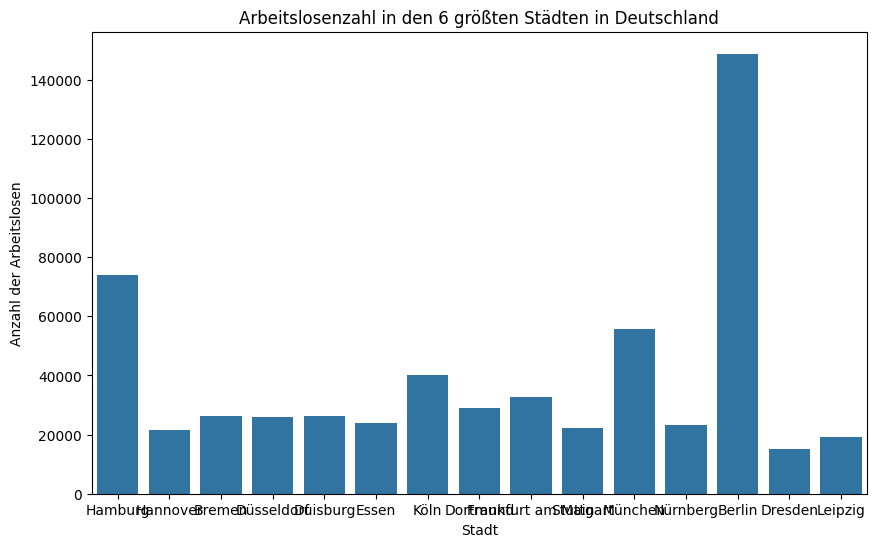

In [30]:
# Filter auf die 6 größten Städte (z.B. Berlin, Hamburg, München, Köln, Frankfurt am Main, Stuttgart)
grossstaedte = ['Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main', 
    'Stuttgart', 'Düsseldorf', 'Leipzig', 'Dortmund', 'Essen',
    'Bremen', 'Dresden', 'Hannover', 'Nürnberg', 'Duisburg']
grossstaedte_df = merged_df[merged_df['name'].isin(grossstaedte)]

# Visualisierung der Arbeitslosenzahl in den 6 größten Städten
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='erwerbstat_kurz_stp__12', data=grossstaedte_df)
plt.title('Arbeitslosenzahl in den 6 größten Städten in Deutschland')
plt.xlabel('Stadt')
plt.ylabel('Anzahl der Arbeitslosen')
plt.show()

# choroplethenkarte

   landesschluessel  erwerbstätige  arbeitslose  arbeitslosenquote  \
0                01        1649600        65980           3.845930   
1                02        1737860        73870           4.077318   
2                03        5875630       184660           3.047049   
3                04         676590        33180           4.674754   
4                05       17140660       622330           3.503521   
5                06        4733370       166030           3.388782   
6                07        1696710        61520           3.498973   
7                08        7546060       236080           3.033613   
8                09        7122400       264850           3.585231   
9                10         898090        29250           3.154183   
10               11        3484430       148750           4.094209   
11               12        1673170        49320           2.863297   
12               13         688610        24670           3.458670   
13               14 

C:\Users\hp\AppData\Local\Temp\ipykernel_29660\3213660904.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arbeitslosenquote', y='name', data=bundesland_data, palette='viridis')


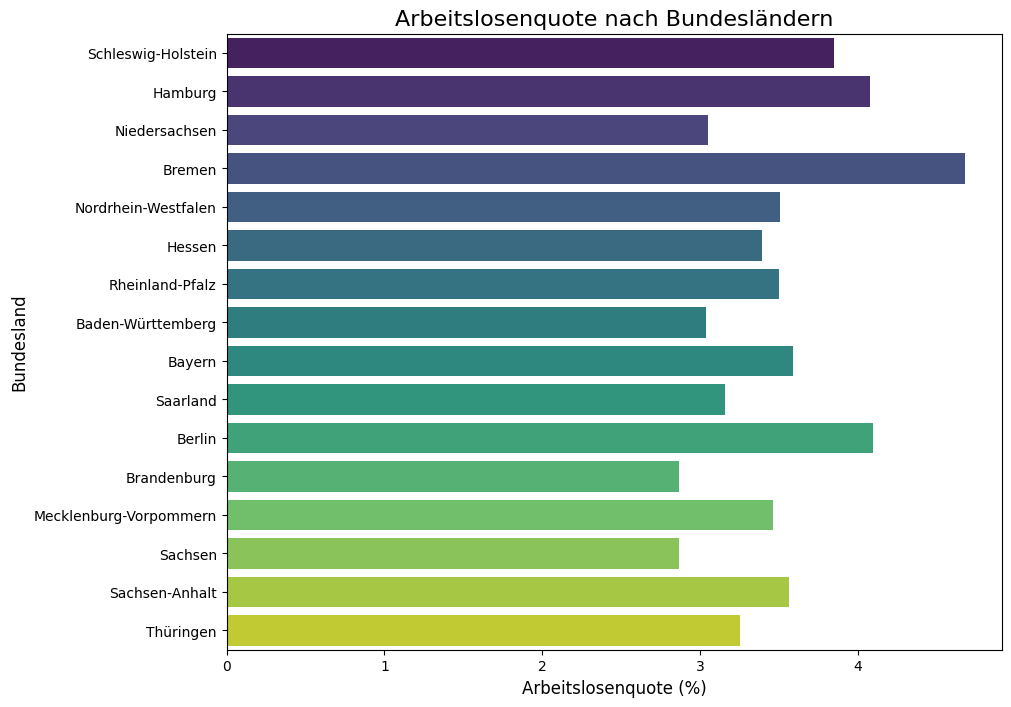

In [31]:
# Laden der notwendigen Tabellen
faktentabelle_df = load_table('faktentabelle', engine)
land_df = load_table('dim_land', engine)

# Aggregieren der Daten nach Bundesland
bundesland_data = faktentabelle_df.groupby('landesschluessel').agg(
    erwerbstätige=('erwerbstätige', 'sum'),
    arbeitslose=('arbeitslose', 'sum')
).reset_index()

# Berechnen der Arbeitslosenquote (in Prozent)
bundesland_data['arbeitslosenquote'] = (bundesland_data['arbeitslose'] / (bundesland_data['erwerbstätige'] + bundesland_data['arbeitslose'])) * 100

# Merge mit dem Bundeslandnamen
bundesland_data = bundesland_data.merge(land_df, on='landesschluessel')

# Anzeige der aggregierten Daten
print(bundesland_data)

# Plot erstellen
plt.figure(figsize=(10, 8))
sns.barplot(x='arbeitslosenquote', y='name', data=bundesland_data, palette='viridis')

# Titel und Labels hinzufügen
plt.title('Arbeitslosenquote nach Bundesländern', fontsize=16)
plt.xlabel('Arbeitslosenquote (%)', fontsize=12)
plt.ylabel('Bundesland', fontsize=12)

# Plot anzeigen
plt.show()

In [47]:
# Laden der Tabelle für den höchsten Schulabschluss
dim_hoechster_schulabschluss_df = load_table_from_db('dim_hoechster_schulabschluss', engine)

# Schritt 2: Nur relevante Spalten aus der dim_hoechster_schulabschluss Tabelle auswählen
# Hier werden nur die Schulabschlüsse und der Schlüssel beibehalten
dim_hoechster_schulabschluss_df = dim_hoechster_schulabschluss_df[['schluessel', 'schulabs_stp__21', 'schulabs_stp__23', 'schulabs_stp__24', 'schulabs_stp__3']]

# Umbenennen der Spalte 'schluessel' in 'schluessel_schulabschluss' in dim_hoechster_schulabschluss_df, um Konflikte zu vermeiden
dim_hoechster_schulabschluss_df = dim_hoechster_schulabschluss_df.rename(columns={'schluessel': 'schluessel_schulabschluss'})

# Mergen der dim_hoechster_schulabschluss Tabelle mit dem vorhandenen merged_df
merged_df = merged_df.merge(dim_hoechster_schulabschluss_df, left_on='gemeindeschluessel', right_on='schluessel_schulabschluss', how='left')

# Filtern der 10 größten Städte
groesste_staedte = ['Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main', 
                    'Stuttgart', 'Düsseldorf', 'Dortmund', 'Essen', 'Leipzig']

stadt_df = merged_df[merged_df['name'].isin(groesste_staedte)]

# Aggregieren der Daten für das gestapelte Balkendiagramm
bildungsstand_data = stadt_df.groupby('name').agg(
    haupt_volksschulabschluss=('schulabs_stp__21', 'sum'),
    realschulabschluss=('schulabs_stp__23', 'sum'),
    abitur=('schulabs_stp__24', 'sum'),
    ohne_schulabschluss=('schulabs_stp__3', 'sum')
).reset_index()

# Erstellen des gestapelten Balkendiagramms
bildungsstand_data.set_index('name').plot(kind='bar', stacked=True, figsize=(12, 8))

# Diagramm konfigurieren
plt.title('Bildungsstand in den 10 größten Städten Deutschlands')
plt.ylabel('Anzahl der Personen')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.legend(title='Schulabschluss')
plt.show()


MergeError: Passing 'suffixes' which cause duplicate columns {'schulabs_stp__3_x', 'schulabs_stp__24_x', 'schulabs_stp__23_x', 'schulabs_stp__21_x'} is not allowed.